In [67]:
import pandas as pd 
import numpy as np
import ijson
from urllib2 import urlopen



In [68]:

api_url = 'https://www.quandl.com/api/v1/datasets/WIKI/%s.json' % 'AAPL'
#objects = ijson.items(json, 'columns')
f = urlopen('https://www.quandl.com/api/v1/datasets/WIKI/AAPL.json')
objects = ijson.items(f, 'column_names')
#tmp = objects[0]
tmp = list(objects)[0]
columns = []
for val in tmp:
    columns.append(val)

In [69]:
f = urlopen('https://www.quandl.com/api/v1/datasets/WIKI/AAPL.json')
objects = ijson.items(f, 'data')
tmp = list(objects)[0]
data = []
for val in tmp:
    data.append(val)


In [70]:
data = pd.DataFrame(data, columns=columns)
data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2016-08-19,108.77,109.69,108.36,109.36,24870365,0,1,108.77,109.69,108.36,109.36,24870365
1,2016-08-18,109.23,109.6,109.02,109.08,20502609,0,1,109.23,109.6,109.02,109.08,20502609
2,2016-08-17,109.1,109.37,108.34,109.22,25057327,0,1,109.1,109.37,108.34,109.22,25057327
3,2016-08-16,109.63,110.23,109.21,109.39,33502732,0,1,109.63,110.23,109.21,109.39,33502732
4,2016-08-15,108.14,109.54,108.08,109.51,25346817,0,1,108.14,109.54,108.08,109.51,25346817


In [71]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [72]:
#output_file("test.html")
p = figure()
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
show(p)

In [97]:
from bokeh.plotting import output_file

#output_file('test.html')
output_notebook()

Loading BokehJS ...

In [98]:
#plot = figure(title='Data from Quandle WIKI set',
#              x_axis_label='date',
#              x_axis_type='datetime')

p = figure()
p = p.line(list(data['Close'][:100]))
#p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
show(p)
#print data['Close'][:1000]

RuntimeError: Unable to save object of type '<class 'bokeh.models.renderers.GlyphRenderer'>'

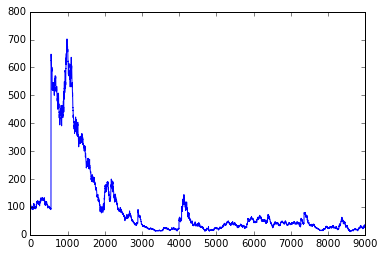

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data['Close'])

In [74]:
from bokeh.embed import components 

script, div = components(plot)

return render_template('graph.html', script=script, div=div)